# Using HCIDataset objects

In [1]:
import vip_hci as vip
vip.__version__

'0.9.8'

> Author: [Ralf Farkas](https://github.com/r4lv)  
> Date: *26/09/2019*

The `HCIDataset` class is VIP's main entry point to process data. It contains the data cube with the associated parallactic angles and a PSF, but also information about injected companions and the FWHM.
A `HCIDataset` object has many methods for dataset-related operations (e.g. recentering, subsampling, injecting fake companions) which can be directly applied to them. `HCIDataset` supports both 3D (ADI) and 4D (ADI+mSDI) data.

The following tutorial gives an overview of the new *object oriented* way of using VIP.

### Table of Contents

1. [Create a HCIDataset object](#1.-Create-a-HCIDataset-object)
    - [1.1 from FITS files](#1.1-from-FITS-files)
    - [1.2 storing/loading a HCIDataset](#1.2-storing/loading-a-HCIDataset)
2. [Operations on a HCIDataset](#2.-Operations-on-a-HCIDataset)
    - [2.1 displaying](#2.1-displaying)
    - [2.2 access and change attributes](#2.2-access-and-change-attributes)
    - [2.3 modifying the object using methods](#2.3-modifying-the-object-using-methods)
    - [2.4 injecting companions](#2.4-injecting-companions)

## 1. Create a HCIDataset object

### 1.1 from FITS files

The `VIP_extras` repository contains a folder with example datasets:

In [2]:
!ls ../datasets

naco_betapic.npz       naco_betapic_pa.fits
naco_betapic_cube.fits naco_betapic_psf.fits


To create a `HCIDataset` object, we can directly pass the paths to the FITS files:

In [3]:
betapic = vip.HCIDataset(cube="../datasets/naco_betapic_cube.fits",
                         angles="../datasets/naco_betapic_pa.fits",
                         psf="../datasets/naco_betapic_psf.fits")

Cube array shape: (61, 101, 101)
Angles array shape: (61, 1)
PSF array shape: (39, 39)


or, equivalently, use numpy arrays in memory:

In [4]:
cube = vip.fits.open_fits("../datasets/naco_betapic_cube.fits")
angles = vip.fits.open_fits("../datasets/naco_betapic_pa.fits")
psf = vip.fits.open_fits("../datasets/naco_betapic_psf.fits")

betapic = vip.HCIDataset(cube=cube, angles=angles, psf=psf)

Fits HDU-0 data successfully loaded. Data shape: (61, 101, 101)
Fits HDU-0 data successfully loaded. Data shape: (61, 1)
Fits HDU-0 data successfully loaded. Data shape: (39, 39)
Cube array shape: (61, 101, 101)
Angles array shape: (61, 1)
PSF array shape: (39, 39)


### 1.2 storing/loading a HCIDataset

A `HCIDataset` object, with all the information associated to it, can be stored as one single file. That can be especially useful for reproducing results later, or for sharing a dataset as one compact entity. Internally, VIP uses numpy's compressed `npz` format for that, so the data in the file could also be opened on machines without VIP installed.

The `HCIDataset` can be stored to disk using it's `.save()` method, which takes the filename as a parameter:

In [5]:
betapic.save("betapic_hci_dataset")

The `.npz` extension is automatically appended:

In [6]:
!ls -1

01_adi_pre-postproc_fluxpos_ccs.ipynb
02_hcidataset.ipynb
betapic_hci_dataset.npz


The file we just stored can be loaded again using the `HCIDataset.load()`:

In [7]:
betapic_from_file = vip.HCIDataset.load("betapic_hci_dataset")

Now `betapic_from_file` is exactly the same HCIDataset object as `betapic`.

## 2. Operations on a HCIDataset

The complete list of methods can be found in the [VIP documentation](https://vip.readthedocs.io/en/latest/vip_hci.html#module-vip_hci.hci_dataset). The following should give a short overview.

### 2.1 displaying

Displaying the data is easy. Note than in Jupyter, you can usually double-click an image to zoom in.

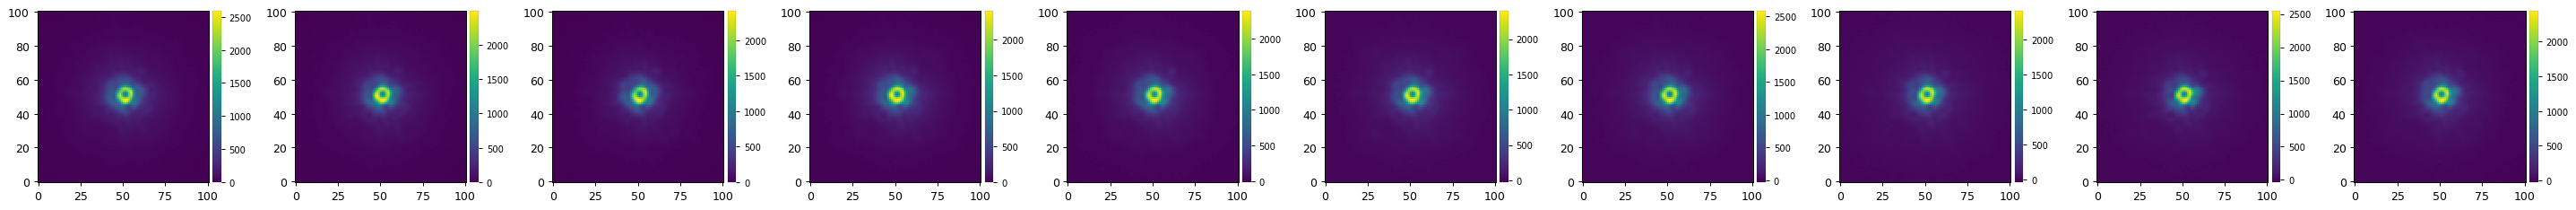

In [8]:
betapic.plot()

### 2.2 access and change attributes

One can access the underlaying data using attributes:

In [9]:
# access the underlaying data:
betapic.psf.shape

(39, 39)

Attributes can also be set directly:

In [10]:
betapic.px_scale = vip.conf.VLT_NACO["plsc"]
betapic.px_scale

0.02719

### 2.3 modifying the object using methods

Many of the operations require a normalized psf:

In [11]:
betapic.normalize_psf()

Mean FWHM: 4.801
Flux in 1xFWHM aperture: 1.307
Normalized PSF array shape: (39, 39)
The attribute `psfn` contains the normalized PSF
`fwhm` attribute set to
4.801


...which creates a `fwhm` attribute:

In [12]:
betapic.fwhm

4.8009718484811135

### 2.4 injecting companions

In [13]:
betapic.inject_companions(flux=10000, rad_dists=30, n_branches=2)

Branch 1:
	(X,Y)=(80.00, 50.00) at 0.82 arcsec (30.00 pxs)
Branch 2:
	(X,Y)=(20.00, 50.00) at 0.82 arcsec (30.00 pxs)
Coordinates of the injections stored in self.injections_yx


In [14]:
betapic.injections_yx

[(50.0, 80.0), (50.00000000000001, 20.0)]

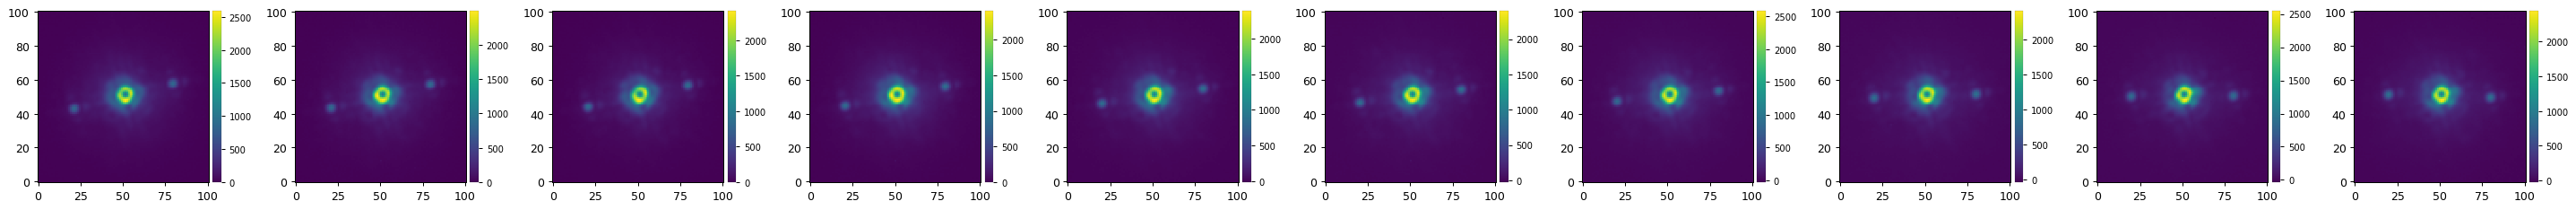

In [15]:
betapic.plot()